In [1]:
# Code you have previously used to load data

import pandas as pd

iowa_file_path = './train.csv'

home_data = pd.read_csv(iowa_file_path)

home_data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [2]:
# My Objective is the SalePrice
y = home_data.SalePrice

### Select My Features

In [12]:
# Feature
feature_names = ["Street", "YrSold", "LotArea", "YearBuilt", "SaleCondition", "SaleType", "GarageCars"];

# Select the categoricals of my feature
feature_names_categoricals = ["Street", "SaleCondition", "SaleType"];

# Select the numericals
feature_names_numericals = ["YrSold", "LotArea", "YearBuilt", "GarageCars", "SalePrice"];

### Prepare my categoricals features

In [13]:
home_data_model_categoricals = home_data[feature_names_categoricals];

for nome_coluna in home_data_model_categoricals.columns:
    home_data_model_categoricals[nome_coluna].fillna('NOT_VALUED',  inplace = True)
    
dataset_categorico_corrigido = pd.get_dummies(home_data_model_categoricals)

dataset_categorico_corrigido.head()

,Street_Grvl,Street_Pave,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


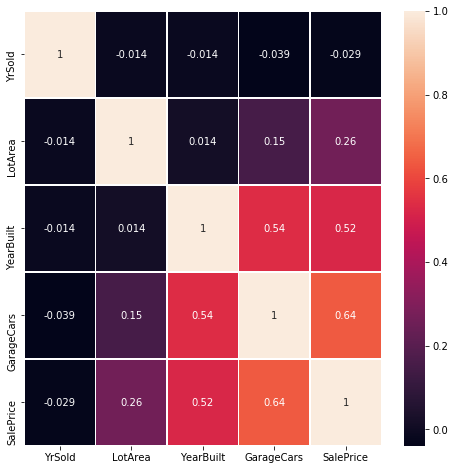

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

ig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(home_data[feature_names_numericals].corr(), annot=True, linewidths=.5, ax=ax)



In [5]:
data_set_numericals = home_data[feature_names_numericals];

dataset_concat = pd.concat([dataset_categorico_corrigido, data_set_numericals], axis = 1)



X = dataset_concat;

print(X.head())

   Street_Grvl  Street_Pave  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0            0            1                      0                      0   
1            0            1                      0                      0   
2            0            1                      0                      0   
3            0            1                      1                      0   
4            0            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  SaleType_COD  SaleType_CWD  ...  SaleType_ConLD  \
0                      0         

### Using DecisionTree

In [6]:
from sklearn.tree import DecisionTreeRegressor

iowa_model = DecisionTreeRegressor(random_state=1)

iowa_model.fit(X, y)

predictions = iowa_model.predict(X)

print(predictions)

print(y.head())


[208500. 184250. 223500. ... 266500. 142125. 147500.]
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
